In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:

# Create a synthetic dataset
np.random.seed(42)
n_samples = 100

square_footage = np.random.randint(500, 4000, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
bathrooms = np.random.randint(1, 4, n_samples)
prices = (square_footage * 300) + (bedrooms * 50000) + (bathrooms * 30000) + np.random.randint(-50000, 50000, n_samples)

In [13]:

data = pd.DataFrame({
    'SquareFootage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': prices
})

# Display the first few rows of the dataset
print(data.head())


   SquareFootage  Bedrooms  Bathrooms    Price
0           3674         1          1  1193335
1           1360         5          2   718108
2           1794         5          1   862379
3           1630         2          2   689272
4           1595         5          2   776967


In [15]:
# Check for missing values
print(data.isnull().sum())

SquareFootage    0
Bedrooms         0
Bathrooms        0
Price            0
dtype: int64


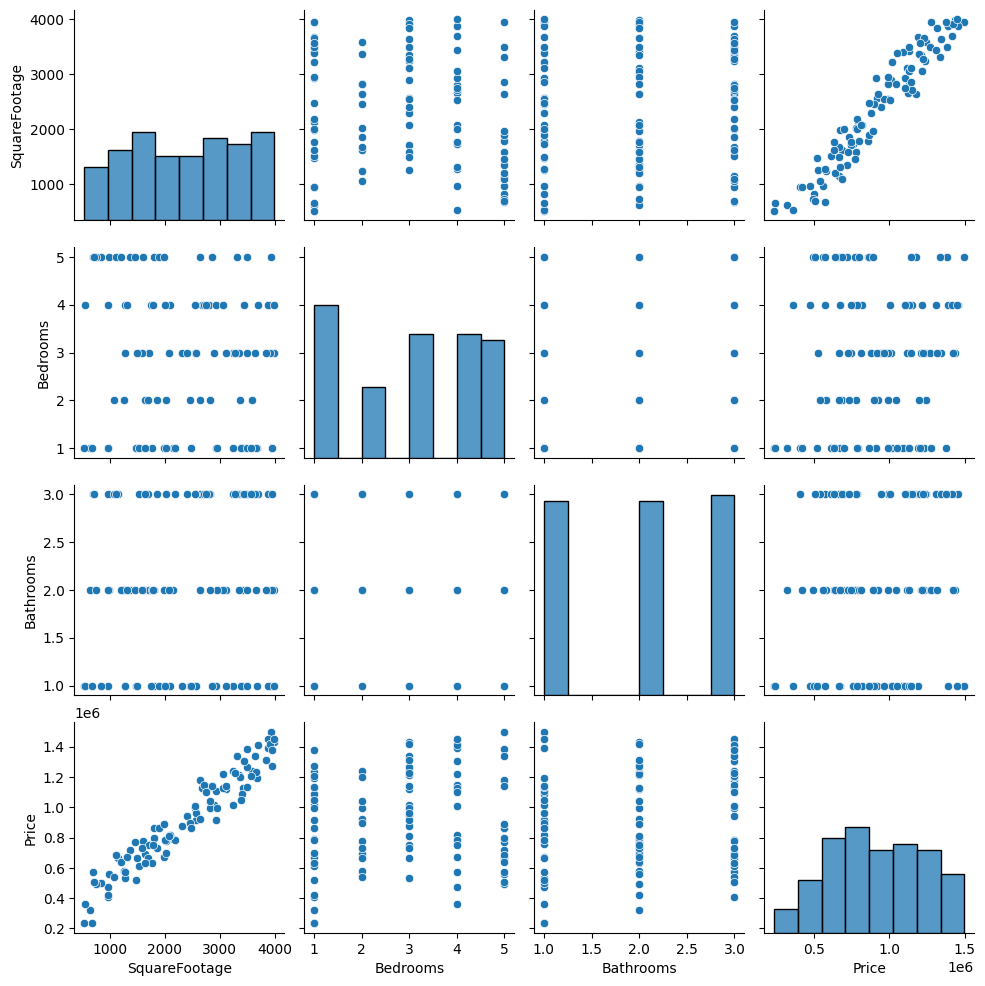

In [16]:
# Visualize the data
sns.pairplot(data)
plt.show()

In [17]:
# Check the correlation matrix
print(data.corr())

               SquareFootage  Bedrooms  Bathrooms     Price
SquareFootage       1.000000 -0.141454   0.072181  0.963725
Bedrooms           -0.141454  1.000000   0.041728  0.097302
Bathrooms           0.072181  0.041728   1.000000  0.166113
Price               0.963725  0.097302   0.166113  1.000000


In [18]:
# Split the data into features (X) and target (y)
X = data[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = data['Price']


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 80
Testing set size: 20


In [20]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print the coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [  303.73296037 49792.70058467 29387.54026269]
Intercept: -9377.32071111654


In [21]:


# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 750736713.5111605
R^2 Score: 0.9931583191643701


In [24]:
# Save results to a CSV file
results = pd.DataFrame({
    'Actual Prices': y_test,
    'Predicted Prices': y_pred
})
results.to_csv('results.csv', index=False)

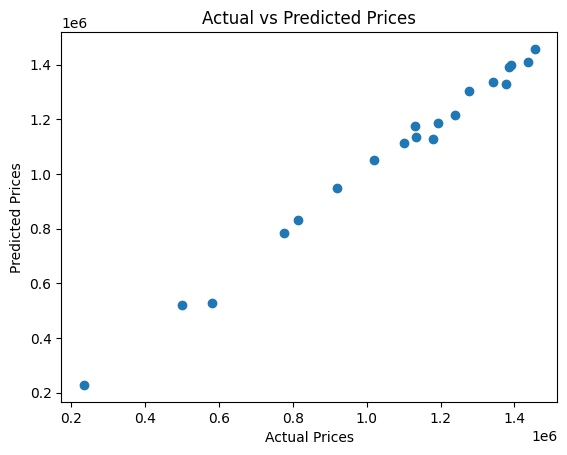

In [25]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()